<a href="https://colab.research.google.com/github/SeaBebop/DCM-4/blob/main/DCM_Colab_Relu_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#In order for this program to work you NEED:

#1. DCM_File_Paths_Reduced.csv (This is the 700 images in csv format, all organized to locate the images in your google drive)
# Without it the program doesn't know where the images are
# To Upload the file run:
# from google.colab import files
# uploaded = files.upload()

#2. reduced_files folder
# This should be in your google drive, mount the drive to colab to access it

#3. Install tensorflow, tqdm, pydicom
# This is done with !pip install <insert library>

#To test if this is working, run this cell
#You should see /content/drive/MyDrive/reduced_files/Calc-Test_P_00041_LEFT_CC_2/1-1.dcm as an output

import numpy as np
from sklearn.preprocessing import MinMaxScaler
import csv
import keras
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D
from keras.layers import MaxPooling2D, UpSampling2D, Flatten, Reshape
#from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm
      # install the pydicom package
from PIL import Image # install the pillow package and it is called PIL.
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
# train autoencoder for classification with no compression in the bottleneck layer
import keras
from keras import layers

data = pd.read_csv("/content/DCM_File_Paths_Reduced.csv")

size_list_dir = []
finalized_list_dir = []

#Will be used for comparsion to find the ROI dcm files
Label_list = []
#Number of Images
Number_of_Images=[]
Pathology=[]
folder = []
#The counter is used to align the labels and the File Location together
counter = 0;

#print()
#Checker is to test the individual file location and how does it look as a str
checker = ''
data=data.sort_values('DCM_File_Path')
#Select if Mass or Calc
print(data[data['Label'].str.contains("Mass")]) #Checking if it works
data = data[data['Label'].str.contains("Mass")] #Filtered for just Mass
#data = data[data['Label'].str.contains("Calc")] #Can pick calc instead, comment Mass
reduced_file_path =  '/content/drive/MyDrive/reduced_files/'
#Figuring out how to extract data from googledrive
print( reduced_file_path + data['Label'].iloc[0] +"/" + os.listdir('/content/drive/MyDrive/reduced_files/' + data['Label'].iloc[0])[0])


      Unnamed: 0                                      DCM_File_Path  \
886         3962  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Test...   
862         3822  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Test...   
950         4457  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Test...   
913         4190  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Test...   
852         3750  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Test...   
...          ...                                                ...   
1081        5301  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Trai...   
1247        6392  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Trai...   
1031        5006  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Trai...   
1165        5848  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Trai...   
1139        5675  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Trai...   

      DCM_File_Size                              Label  Number of Images  \
886           84544        Mass-Test_P_00017_LEFT_CC_1                 

In [8]:
    import numpy as np
    import keras
    from keras.models import Model, Sequential
    from keras.layers import Input, Dense, Conv2D
    from keras.layers import MaxPooling2D, UpSampling2D, Flatten, Reshape

    import matplotlib.pyplot as plt
    import pandas as pd

    import numpy as np
    from sklearn.preprocessing import MinMaxScaler
    from tensorflow.keras.preprocessing.image import load_img, img_to_array
    from tensorflow.keras.models import Model, Sequential
    import keras
    from keras.models import Model, Sequential
    from keras.layers import Input, Dense, Conv2D, BatchNormalization, LeakyReLU
    from keras.layers import MaxPooling2D, UpSampling2D, Flatten, Reshape
    #from keras.preprocessing.image import load_img, img_to_array
    from tensorflow.keras.regularizers import l1
    import matplotlib.pyplot as plt

    import pydicom        # install the pydicom package
    from PIL import Image # install the pillow package and it is called PIL.
    from sklearn.model_selection import train_test_split

    from matplotlib import pyplot
    # train autoencoder for classification with no compoutputression in the bottleneck layer
    import keras
    from keras import layers
    # train autoencoder for classification with no compression in the bottleneck layer
    import keras
    from keras import layers
    h = 256
    w = 256
    ch = 1



    #This is the example code that tests out dcms
    #Using the finalized_list_dir I can use my locations
    #This also means of course I can loop them, show the labels of each of them,etc

    trigger = 0
    counter = 0
    dcmMask = np.zeros((len(data),h,w,1), dtype="float")
    y_label = []


    for i in tqdm(range(0,len(data))):
        #Setting up x and y
        dicomdata = pydicom.read_file(reduced_file_path + data['Label'].iloc[i]
                                      + "/" + os.listdir('/content/drive/MyDrive/reduced_files/' + data['Label'].iloc[i])[0],force=True)  # masked image
        if data['Classification'].iloc[i]  == 'BENIGN':
            y_label.append(0)
        else:
            y_label.append(1)

        #Testing if labels and dcm align properly
        #if trigger < 5:
        #    print('This is class ',i+20,edited_df['Classification'].iloc[i+20])
        #    print('This is path ', i+20,edited_df['DCM_File_Path'].iloc[i+20])
        #    trigger+=1
        #Converting to numpy array
        tmp = np.zeros((dicomdata.Rows, dicomdata.Columns), dtype="float32")
        tmp = dicomdata.pixel_array/65535.0

        img = Image.fromarray(tmp)
        img_resize = img.resize((h,w), Image.LANCZOS)
        tmp2 = img_to_array(img_resize)
        dcmMask[i] = tmp2.reshape((h,w,ch))
        #Testing if data is set up as a 3d Rensor
        """
        if trigger != 10:
            print('this is dimension',dcmMask[i].ndim)
            print('this is shape',dcmMask[i].shape)
            print('this is type',dcmMask[i].dtype)
            print('this looks like this', dcmMask[i])
            print('this is path:',reduced_file_path + data['Label'].iloc[i]
                                      + "/" + os.listdir('/content/drive/MyDrive/reduced_files/' + data['Label'].iloc[i])[0])
            print('this is path classification:',data['Classification'].iloc[i])
            trigger+=1
        """
        #If you are interested to see all the pictures individually,increased runtime
        #data = tmp2.reshape((h,w,ch))
        #plt.imshow(np.reshape(data, (h, w)), cmap='gray')
        #plt.show()
    #print(dcmMask.shape)


100%|██████████| 493/493 [03:37<00:00,  2.27it/s]


In [13]:
    from keras.layers import Input, Dense, Conv2D, BatchNormalization, LeakyReLU


    input_img = Input(shape=(h,w,ch))
    encoding_dim = 6

    x = Conv2D(64,(3,3),activation='relu',padding='same')(input_img)
    x = BatchNormalization(name="encoder_norm_1")(x)
    x = LeakyReLU(name="encoder_leakyrelu_1")(x)
    x = MaxPooling2D((2,2),padding='same')(x)

    x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
    x = BatchNormalization(name="encoder_norm_2")(x)
    x = LeakyReLU(name="encoder_leakyrelu_2")(x)
    x = MaxPooling2D((2,2),padding='same')(x)

    x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
    x = BatchNormalization(name="encoder_norm_3")(x)
    x = LeakyReLU(name="encoder_leakyrelu_3")(x)
    x = MaxPooling2D((2,2),padding='same')(x)

    x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
    x = BatchNormalization(name="encoder_norm_4")(x)
    x = LeakyReLU(name="encoder_leakyrelu_4")(x)
    x = MaxPooling2D((2,2),padding='same')(x)

    x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
    x = BatchNormalization(name="encoder_norm_5")(x)
    x = LeakyReLU(name="encoder_leakyrelu_5")(x)
    x = MaxPooling2D((2,2),padding='same')(x)

    x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
    x = BatchNormalization(name="encoder_norm_6")(x)
    x = LeakyReLU(name="encoder_leakyrelu_6")(x)
    x = MaxPooling2D((2,2),padding='same')(x)
    x = Flatten()(x)

    encoded = Dense(42, activation='relu')(x)

    # Decoda
    x = Dense(4*4*8, activation='relu')(encoded)
    x = Reshape((4,4,8))(x)

    x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
    x = BatchNormalization(name="decoder_norm_1")(x)
    x = LeakyReLU(name="decoder_leakyrelu_1")(x)
    x = UpSampling2D((2,2))(x)

    x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
    x = BatchNormalization(name="decoder_norm_2")(x)
    x = LeakyReLU(name="decoder_leakyrelu_2")(x)
    x = UpSampling2D((2,2))(x)

    x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
    x = BatchNormalization(name="decoder_norm_3")(x)
    x = LeakyReLU(name="decoder_leakyrelu_3")(x)
    x = UpSampling2D((2,2))(x)

    x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
    x = BatchNormalization(name="decoder_norm_4")(x)
    x = LeakyReLU(name="decoder_leakyrelu_4")(x)
    x = UpSampling2D((2,2))(x)

    x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
    x = BatchNormalization(name="decoder_norm_5")(x)
    x = LeakyReLU(name="decoder_leakyrelu_5")(x)
    x = UpSampling2D((2,2))(x)


    x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
    x = BatchNormalization(name="decoder_norm_6")(x)
    x = LeakyReLU(name="decoder_leakyrelu_6")(x)
    x = UpSampling2D((2,2))(x)

    decoded = Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

    autoencoder = Model(input_img, decoded)
    encoder = Model(input_img, encoded)
    autoencoder.compile(optimizer='Adam', loss='mse')

    autoencoder.summary()



Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_26 (Conv2D)          (None, 256, 256, 64)      640       
                                                                 
 encoder_norm_1 (BatchNormal  (None, 256, 256, 64)     256       
 ization)                                                        
                                                                 
 encoder_leakyrelu_1 (LeakyR  (None, 256, 256, 64)     0         
 eLU)                                                            
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 128, 128, 64)     0         
 g2D)                                                            
                                                           

Epoch 1/20
6/6 [==============================] - 318s 52s/step - loss: 0.0015
Epoch 2/20
6/6 [==============================] - 302s 50s/step - loss: 0.0015
Epoch 3/20
6/6 [==============================] - 299s 49s/step - loss: 0.0015
Epoch 4/20
6/6 [==============================] - 303s 50s/step - loss: 0.0014
Epoch 5/20
6/6 [==============================] - 308s 51s/step - loss: 0.0019
Epoch 6/20
6/6 [==============================] - 301s 50s/step - loss: 0.0015
Epoch 7/20
6/6 [==============================] - 299s 49s/step - loss: 0.0014
Epoch 8/20
6/6 [==============================] - 298s 49s/step - loss: 0.0016
Epoch 9/20
6/6 [==============================] - 299s 49s/step - loss: 0.0018
Epoch 10/20
6/6 [==============================] - 296s 49s/step - loss: 0.0019
Epoch 11/20
6/6 [==============================] - 299s 49s/step - loss: 0.0015
Epoch 12/20
6/6 [==============================] - 296s 49s/step - loss: 0.0018
Epoch 13/20
6/6 [==============================] 

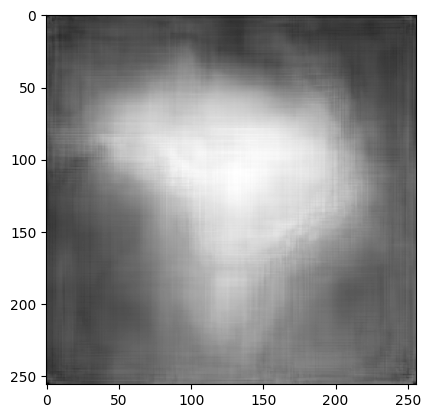

In [65]:

    autoencoder.fit(
    dcmMask,
    dcmMask,
    epochs=20,
    batch_size=86,
    shuffle=True

    )
   # test_loss, test_acc = autoencoder.evaluate(y_train, y_test)
    #print(f"Test accuracy: {test_acc:.3f}")
        ## Generated images
    train_encoded = encoder.predict(dcmMask, verbose=1)
    train_decoded = autoencoder.predict(dcmMask, verbose=1)

    # Check dimesnsions
    print(train_encoded.shape)
    print(train_decoded.shape)



    # Display original image after reshaping
    plt.imshow(dcmMask[0].reshape(256, 256), cmap='gray')



    #Show the generated image by AutoEncoder
    # train_decoded is the output of the decoder,i.e.,regenerated images
    plt.imshow(train_decoded[0].reshape(256, 256), cmap='gray')

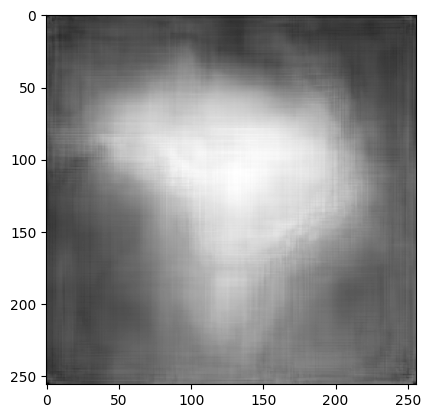

In [66]:
plt.imshow(train_decoded[0].reshape(256, 256), cmap='gray')

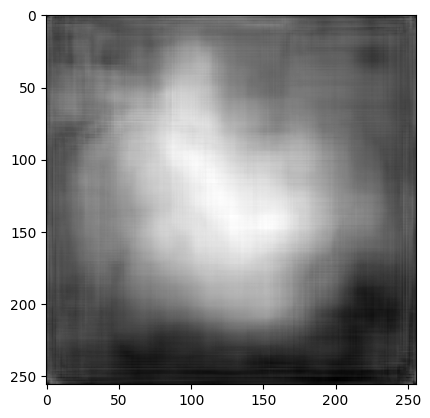

In [67]:
plt.imshow(train_decoded[1].reshape(256, 256), cmap='gray')

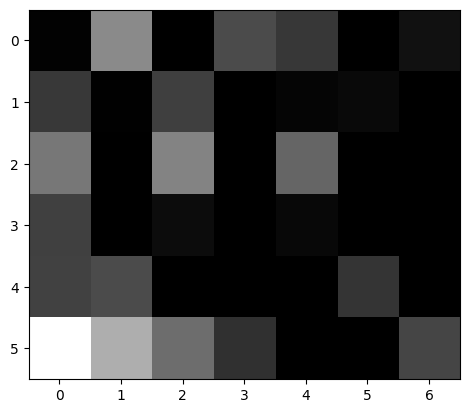

In [68]:
plt.imshow(train_encoded[0].reshape(6, 7), cmap='gray')

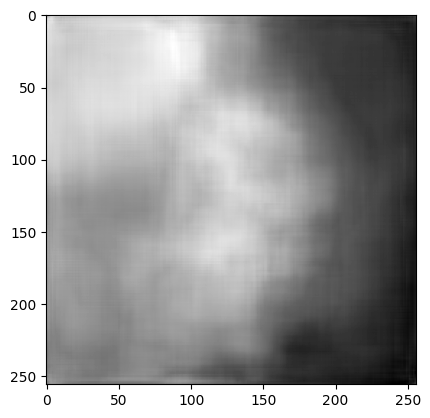

In [69]:
plt.imshow(train_decoded[2].reshape(256, 256), cmap='gray')

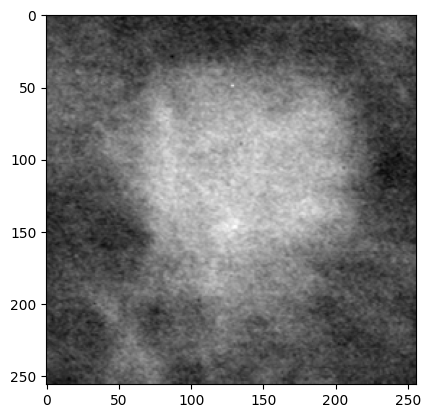

In [70]:
plt.imshow(dcmMask[0].reshape(256, 256), cmap='gray')

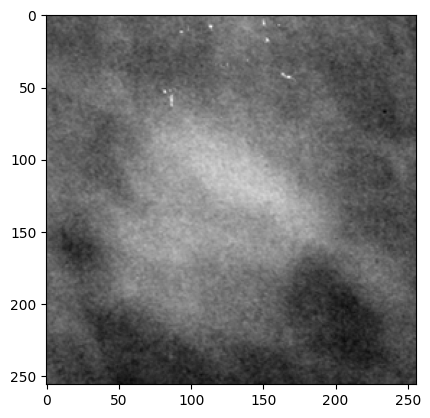

In [71]:
plt.imshow(dcmMask[1].reshape(256, 256), cmap='gray')

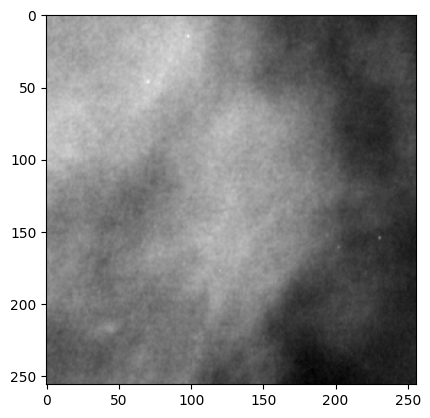

In [72]:
plt.imshow(dcmMask[2].reshape(256, 256), cmap='gray')

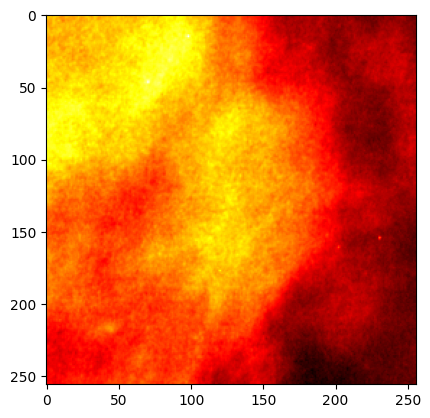

In [73]:
plt.imshow(dcmMask[2].reshape(256, 256,1), cmap='hot')

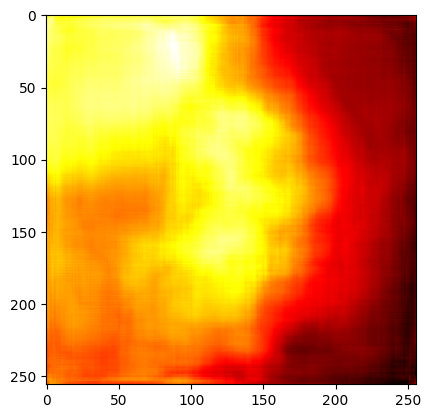

In [74]:
plt.imshow(train_decoded[2].reshape(256, 256,1), cmap='hot')

In [75]:
print(dcmMask[0].reshape(256,256))

[[0.74658173 0.73389018 0.712825   ... 0.71790987 0.72517699 0.71050137]
 [0.71759045 0.71650177 0.71327919 ... 0.71853173 0.72260398 0.71086901]
 [0.72275168 0.72876388 0.72918302 ... 0.71371222 0.70719969 0.70682418]
 ...
 [0.6989544  0.69498962 0.68949527 ... 0.70023131 0.71441579 0.71174866]
 [0.70288223 0.70463681 0.69839257 ... 0.69048434 0.69090819 0.70179039]
 [0.69517821 0.70123005 0.70698643 ... 0.69883132 0.68148893 0.68778455]]


In [76]:
print(train_decoded[0].reshape(256,256))

[[0.681842   0.7004917  0.7336218  ... 0.6950621  0.669252   0.660075  ]
 [0.6872814  0.69268304 0.7181787  ... 0.7111975  0.70157546 0.6949902 ]
 [0.7093147  0.71851844 0.7115447  ... 0.7138949  0.70870584 0.698273  ]
 ...
 [0.7211317  0.71736366 0.7158806  ... 0.7735165  0.7544878  0.76157194]
 [0.70269865 0.7091074  0.7193288  ... 0.7538169  0.73499745 0.73684466]
 [0.67511946 0.65741104 0.7017407  ... 0.76077765 0.70731294 0.68887657]]


In [77]:
train_decoded.shape

(493, 256, 256, 1)

In [78]:
print(dcmMask[0].reshape(256,256))

[[0.74658173 0.73389018 0.712825   ... 0.71790987 0.72517699 0.71050137]
 [0.71759045 0.71650177 0.71327919 ... 0.71853173 0.72260398 0.71086901]
 [0.72275168 0.72876388 0.72918302 ... 0.71371222 0.70719969 0.70682418]
 ...
 [0.6989544  0.69498962 0.68949527 ... 0.70023131 0.71441579 0.71174866]
 [0.70288223 0.70463681 0.69839257 ... 0.69048434 0.69090819 0.70179039]
 [0.69517821 0.70123005 0.70698643 ... 0.69883132 0.68148893 0.68778455]]


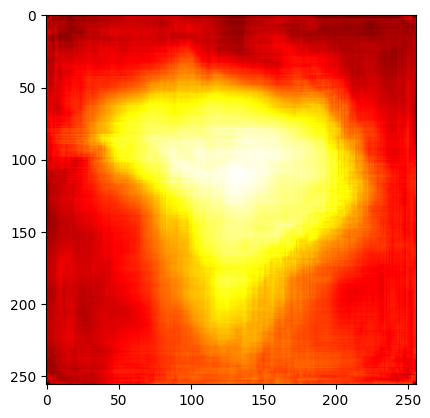

In [79]:
    plt.imshow(train_decoded[0].reshape(256, 256), cmap='hot')

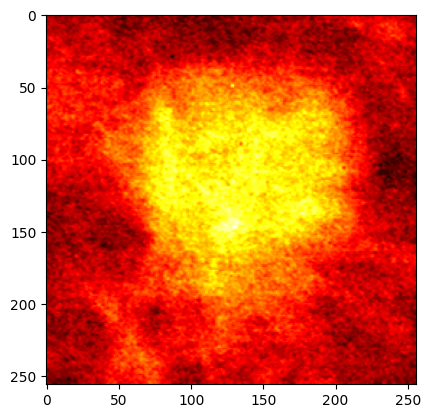

In [80]:
plt.imshow(dcmMask[0].reshape(256, 256,1), cmap='hot')

In [81]:
print(train_decoded[0].reshape(256, 256))

[[0.681842   0.7004917  0.7336218  ... 0.6950621  0.669252   0.660075  ]
 [0.6872814  0.69268304 0.7181787  ... 0.7111975  0.70157546 0.6949902 ]
 [0.7093147  0.71851844 0.7115447  ... 0.7138949  0.70870584 0.698273  ]
 ...
 [0.7211317  0.71736366 0.7158806  ... 0.7735165  0.7544878  0.76157194]
 [0.70269865 0.7091074  0.7193288  ... 0.7538169  0.73499745 0.73684466]
 [0.67511946 0.65741104 0.7017407  ... 0.76077765 0.70731294 0.68887657]]


In [82]:
!pip install pydicom

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install tqdm

In [2]:
!pip install tensorflow


In [1]:
from google.colab import files
uploaded = files.upload()

Saving DCM_File_Paths_Reduced.csv to DCM_File_Paths_Reduced.csv
